In [21]:
'''
AdaGrad  : AdaGrad Gradient Descent

    - Idea of AdaGrad is that different learning rate(?) for different feature at each iteration(time) depending on
      their importance

'''

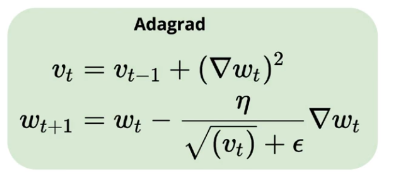

In [ ]:
'''
Varibales in Adagra Gradient Descent
    - V  : velocity 
    - Epsilon : epsilon: A small floating point value to avoid zero denominator
      (The epsilon is to avoid divide by zero error in the above equation while updating the variable when the gradient 
       is almost zero.)
    - vw and vb :Varibales used to compute the movement of the gradient based on the history as well as the current gradient.
'''

'''
Update Parameters

    - We are maintaining the running squared sum of gradients and then we update the parameters by dividing the learning rate 
      with the square root of the historical values.
      
    - Instead of having a static learning rate here we have dynamic learning for dense and sparse features.
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = [30, 35, 37, 59, 70, 76, 88, 100 ]
Y = [1100, 1423, 1377, 1800, 2304, 2588, 3495, 4839]

X = np.reshape(X,(-1,1))
Y = np.reshape(Y,(-1,1))

scaler = MinMaxScaler()
scaler.fit(X)
Y = scaler.transform(X)

In [22]:
theta0=0
theta1=0

vb=0
vw=0

lr = 0.1
eps = 1e-8

iteration = []
loss = []

n = len(X)

for steps in range(100):
    iteration.append(steps)
    
    dtheta0 =0
    dtheta1 =0
    
    for x,y in zip(X,Y):
        
        # pedict theoutput
        predicted = theta0 + x * theta1
        
        n = 1 # one Sample
        dtheta0 += (-(2/n) * np.sum(np.subtract(y,predicted)))
        dtheta1 += (-(2/n) * np.sum(np.multiply(np.subtract(y,predicted),x)))
        
    vb = vb + dtheta0**2
    vw = vw + dtheta1**2
    
    # Updating the weights with different learnig rate
    theta0 = theta0 - (lr / np.sqrt(vb) + eps) * dtheta0
    theta1 = theta1 - (lr / np.sqrt(vw) + eps) * dtheta1
    
    # pedict theoutput
    predicted = theta0 + x * theta1
    
    cost = np.mean((Y - predicted))
    loss.append(cost)

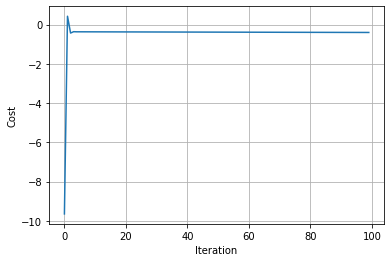

In [23]:
import matplotlib.pyplot as plt

plt.plot(iteration,loss)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\concrete_data.csv")

df.head(3)

,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [29]:
X = df.drop(['concrete_strength'],axis=1).values

y = df['concrete_strength'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [30]:
learningrate = 0.1

m = len(y)

ones = np.ones((m,1)) 
X = np.hstack((ones, X)) 
y = y[:,np.newaxis] 

theta = np.zeros(( X.shape[1],1))

theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [31]:
# AdaGrad

m = len(X)
epochs = 1000
gamma = 0.1 # momentun
eta = 0.1 # Learning rate
eps = 1e-8

v_b,v_w = 0,0

iteration_mom = []
loss_history_mom = []

In [32]:
for epoch in range(10000):
    
    iteration_mom.append(epoch)
    
    # Prediction
    y_pred = np.dot(X,theta)

    # Error
    error = y_pred-y

    # Compute loss function
    cost = np.sum((error)**2,axis=0)[0]

    loss_history_mom.append(cost)
    
    
    # b = theta[:0]
    # w = theta[1:]
    # db = dtheta[:0]
    # dw = dtheta[1:]
    
    # dw += grad_w(x, y)
    # db += grad_b(x, y)
    # v_w += dw**2
    # v_b += db**2
    # w -= (eta / np.sqrt(v_w) + eps) * dw
    # b -= (eta / np.sqrt(v_b) + eps) * db
        

    dtheta = 1/m*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    
    v_b = v_b + dtheta[:0]**2
    v_w = v_w + dtheta[1:]**2

    theta[:0] = theta[:0] - (eta / np.sqrt(v_b) + eps) * dtheta[:0]
    theta[1:] = theta[1:] - (eta / np.sqrt(v_w) + eps) * dtheta[1:]

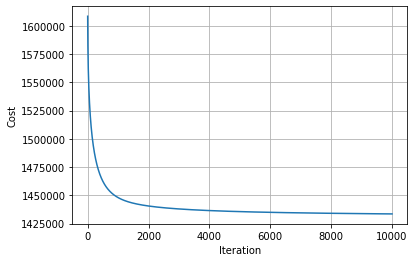

In [33]:
import matplotlib.pyplot as plt
plt.plot(iteration_mom,loss_history_mom)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()